<a href="https://colab.research.google.com/github/Christ2709/IA_Examples/blob/main/prototipo_de_proyectos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
rm -rf `find -type d -name .ipynb_checkpoints`

In [2]:

import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import applications
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow import keras
import tensorflow as tf
import tensorflow_hub as hub


In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np
import os

In [4]:
#!pip uninstall tensorflow

In [5]:
#!pip install tensorflow===2.11.0

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
datagen = ImageDataGenerator(samplewise_center=True,  # set each sample mean to 0
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,
        validation_split=0.2) # we don't expect Bo to be upside-down so we will not flip vertically

In [7]:
dataset_dir = os.path.join("/content/Data")

os.chdir(dataset_dir)
os.rename("ng","ng")
os.rename("ok","ok")

In [8]:
directory='/content/Data'

batch_size = 32
image_size = (160,160) 
train_set = tf.keras.utils.image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=batch_size,
                                             image_size=image_size,
                                             validation_split=0.2,
                                             subset='training',
                                             seed=42)
validation_set = tf.keras.utils.image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=batch_size,
                                             image_size=image_size,
                                             validation_split=0.2,
                                             subset='validation',
                                             seed=42)

Found 62 files belonging to 2 classes.
Using 50 files for training.
Found 62 files belonging to 2 classes.
Using 12 files for validation.


In [9]:
os.chdir(os.pardir)

In [10]:
image_shape = image_size + (3,)
pre_trained_model = tf.keras.applications.MobileNetV2(input_shape=image_shape,
                                               include_top=False,
                                               weights='imagenet')

In [11]:
# normalize the inputs to the range [-1, 1]
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
# freeze the base model by making it non trainable
pre_trained_model.trainable = False
# define the input layer
inputs = tf.keras.Input(shape=image_shape) 
# preprocess the inputs
x = preprocess_input(inputs)
# add the pre-trained (not trainable) model
x = pre_trained_model(x, training=False)
# add a pooling layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)
# add a dropout layer for regularization
x = tf.keras.layers.Dropout(0.2)(x)
# add the output layer
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
# define the model with its inputs and outputs
model = tf.keras.Model(inputs, outputs)

In [12]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [13]:
history = model.fit(train_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2/2 [==============================] - 10s 1s/step - loss: 0.9003 - accuracy: 0.3200 - val_loss: 0.7234 - val_accuracy: 0.3333
Epoch 2/10
2/2 [==============================] - 1s 481ms/step - loss: 0.6682 - accuracy: 0.5200 - val_loss: 0.5347 - val_accuracy: 0.8333
Epoch 3/10
2/2 [==============================] - 1s 471ms/step - loss: 0.5806 - accuracy: 0.7000 - val_loss: 0.3925 - val_accuracy: 1.0000
Epoch 4/10
2/2 [==============================] - 1s 479ms/step - loss: 0.4093 - accuracy: 0.8600 - val_loss: 0.2897 - val_accuracy: 1.0000
Epoch 5/10
2/2 [==============================] - 1s 502ms/step - loss: 0.2978 - accuracy: 0.9200 - val_loss: 0.2188 - val_accuracy: 1.0000
Epoch 6/10
2/2 [==============================] - 1s 524ms/step - loss: 0.2561 - accuracy: 0.9400 - val_loss: 0.1682 - val_accuracy: 1.0000
Epoch 7/10
2/2 [==============================] - 1s 465ms/step - loss: 0.1707 - accuracy: 1.0000 - val_loss: 0.1326 - val_accuracy: 1.0000
Epoch 8/10
2/2 [======

In [14]:
model.save('proto')

In [15]:
from tensorflow import keras

model = keras.models.load_model('proto')

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image, cmap='gray')

In [17]:
#show_image('/content/training/ok/img_14_2022_11_12_123911_686.jpg')

In [18]:
#from tensorflow.keras.preprocessing import image as image_utils

#def load_and_scale_image(image_path):
    #image = image_utils.load_img(image_path, color_mode="rgb", target_size=(160,160,3))
    #return image

1/1 [==============================] - 1s 1s/step
[[0.11190127]]
Ng


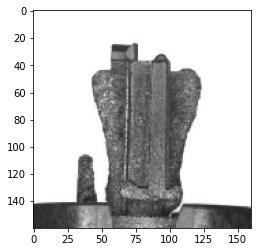

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

rutadeacceso='/content/Testing/img_10_2022_11_12_124522_091.jpg'

def make_predictions(image_path):
   
    image = image_utils.load_img(image_path, color_mode="rgb", target_size=(160,160,3))
    plt.imshow(image)
    image = image_utils.img_to_array(image)
    image = image.reshape(1,160,160,3) 
    image = preprocess_input(image)
    preds = model.predict(image)
    return preds


def prototipado(image_path):
    preds = make_predictions(rutadeacceso)
    if preds[0]<0.5:
        print(preds)
        print("Ng")
    else:
        print(preds)
        print("Ok")
prototipado(rutadeacceso)

1/1 [==============================] - 0s 44ms/step
[[0.838026]]
Ok


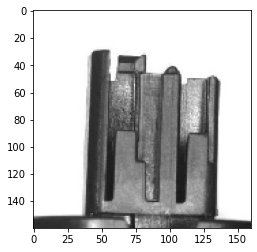

In [20]:
rutadeacceso='/content/Testing/img_34_2022_11_12_123912_482.jpg'
prototipado(rutadeacceso)

1/1 [==============================] - 0s 78ms/step
[[0.11057886]]
Ng


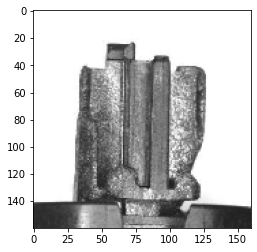

In [21]:
rutadeacceso='/content/Testing/img_01_2022_11_12_124521_855.jpg'
prototipado(rutadeacceso)

1/1 [==============================] - 0s 59ms/step
[[0.8571566]]
Ok


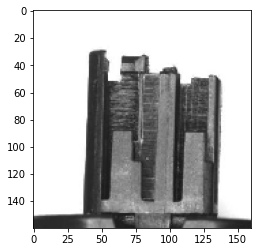

In [22]:
rutadeacceso='/content/Testing/img_43_2022_11_12_123912_825 - Copy.jpg'
prototipado(rutadeacceso)